<a href="https://colab.research.google.com/github/popgenDK/evalPopStructure/blob/main/evalPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load functions and test data



### Load evalPCAfunctions for plotting


In [1]:
#function plotCorRres for plotting correlations
source("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/R/evalPCA.R")


### Load test data

In [2]:

#load genetic test data
load(url("http://pontus.popgen.dk/albrecht/open/admixTjeck/data.Rdata"))

### summaries testdata



In [3]:

#transpose genotype
g <- t(geno)

cat("\ngenotype matrix (g)\n")
dim(g)

cat("\nNumber of Individuals\n")
(N <- ncol(g))

cat("\nNumber of SNPs\n")
( M <- nrow(g))




cat("\n number of individual in each population\n")
pop <- as.factor(pop)
table(pop)


genotype matrix (g)


[1] 54048   374


Number of Individuals


[1] 374


Number of SNPs


[1] 54048


 number of individual in each population


pop
CEU CHB MXL YRI 
 99 103  64 108 

# PCA1 method. Chen and Storey 
There is no centering and the diagonal of the coverance has the mean heterozygoisty subtracted





no missing genotypes


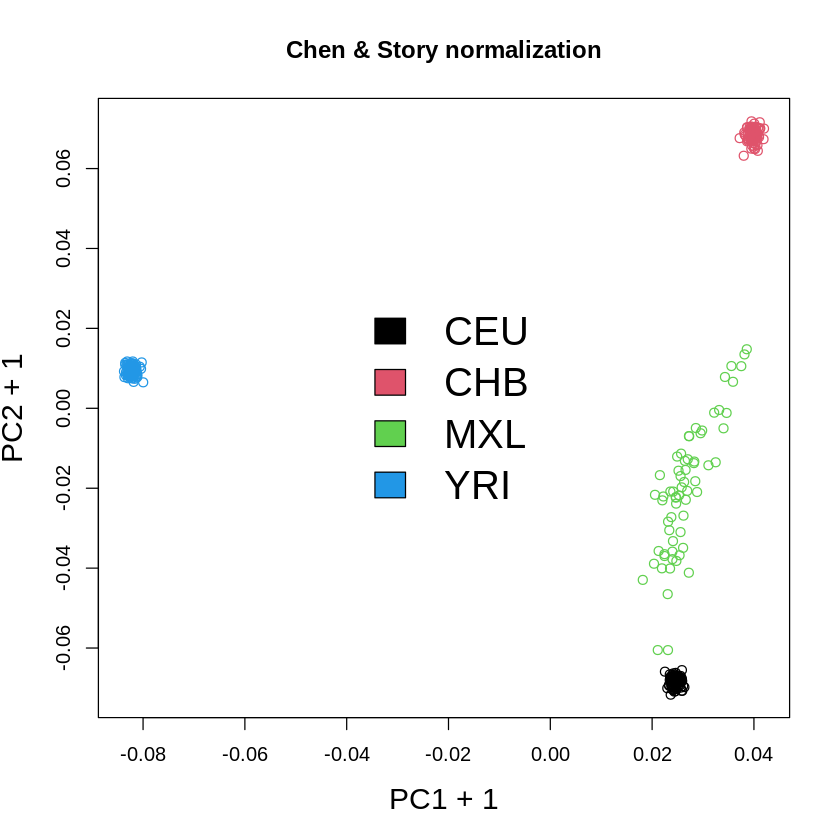

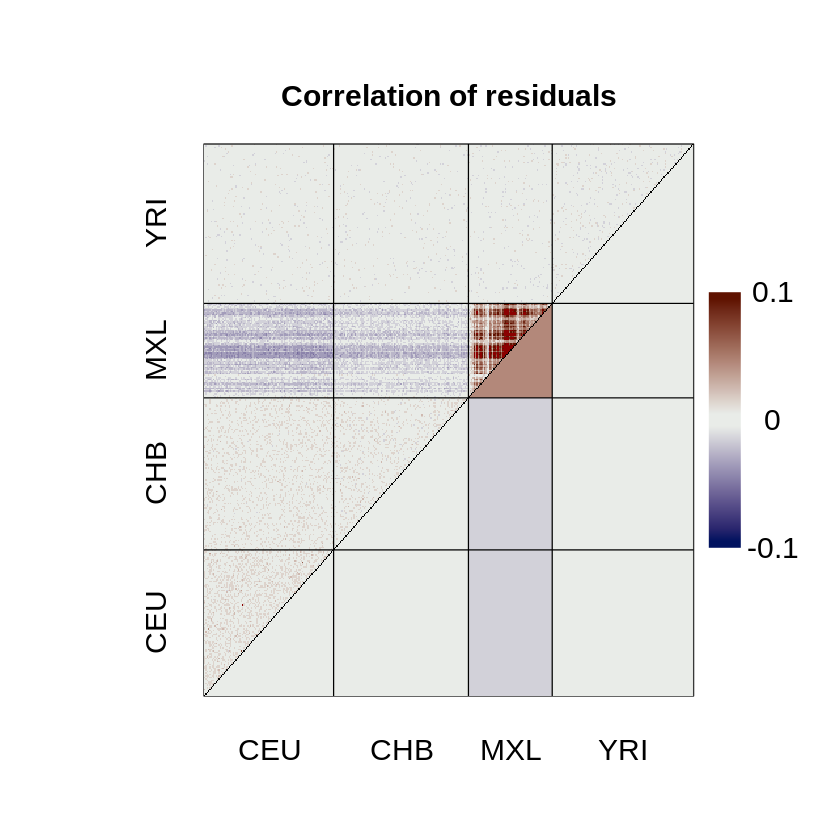

In [4]:

 pca1 <- makePCA(g,method="CS")
 plot(pca1$vectors[,1:2+1],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="Chen & Story normalization")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res1 <- evalPCA(pca1,k=3)
 plotCorRes(res1$corres, pop)


# PCA2: Standard PCA with *centering* of genotypes


no missing genotypes


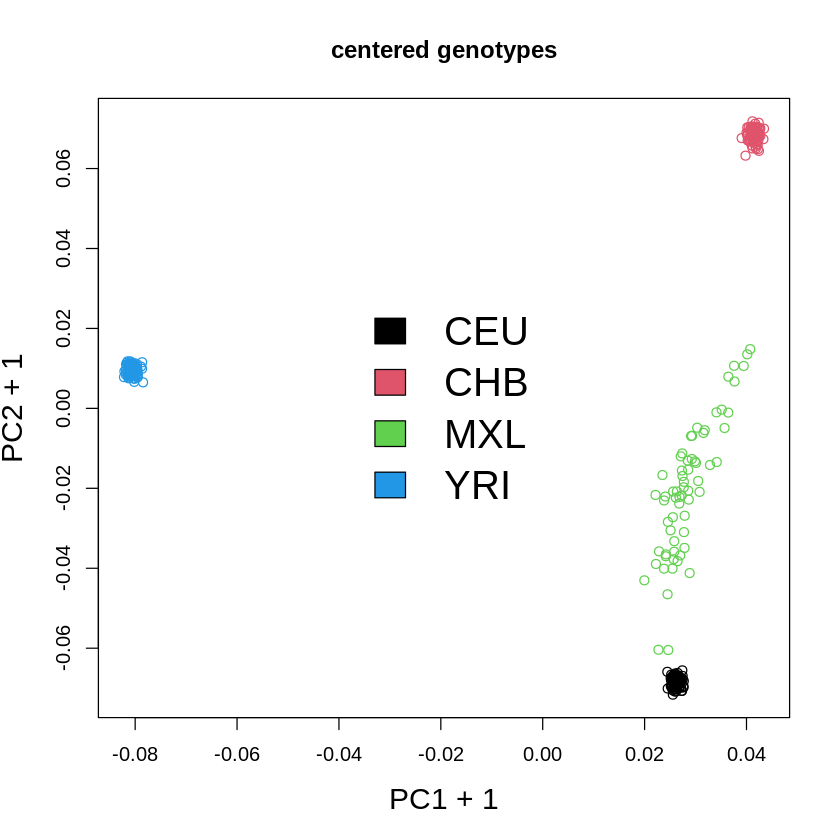

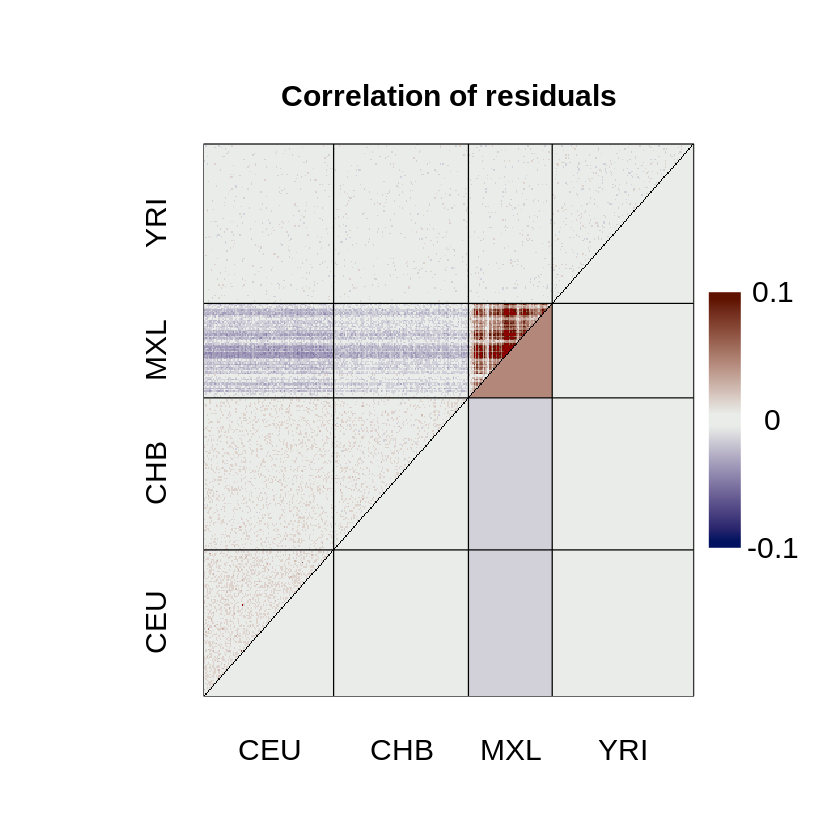

In [5]:

 pca2 <-  makePCA(g,method="standard",center=TRUE,scale=FALSE)
 plot(pca2$vectors[,1:2],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res2 <- evalPCA(pca2,k=2)
 plotCorRes(res2$corres, pop,max=0.1)

# PCA3: Standard PCA with *centering* and scaling


no missing genotypes


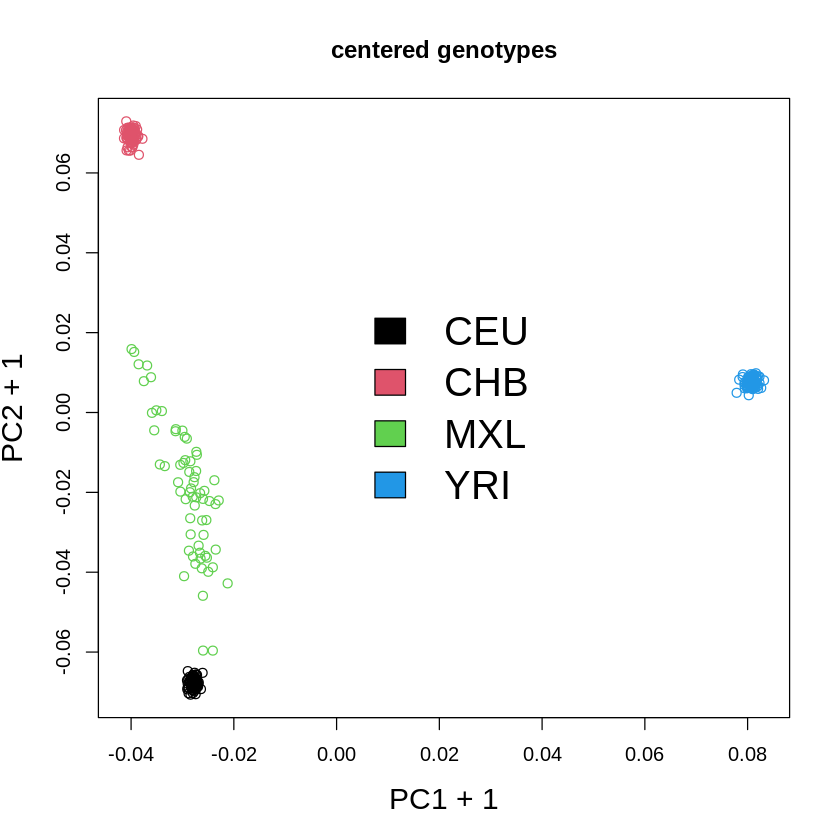

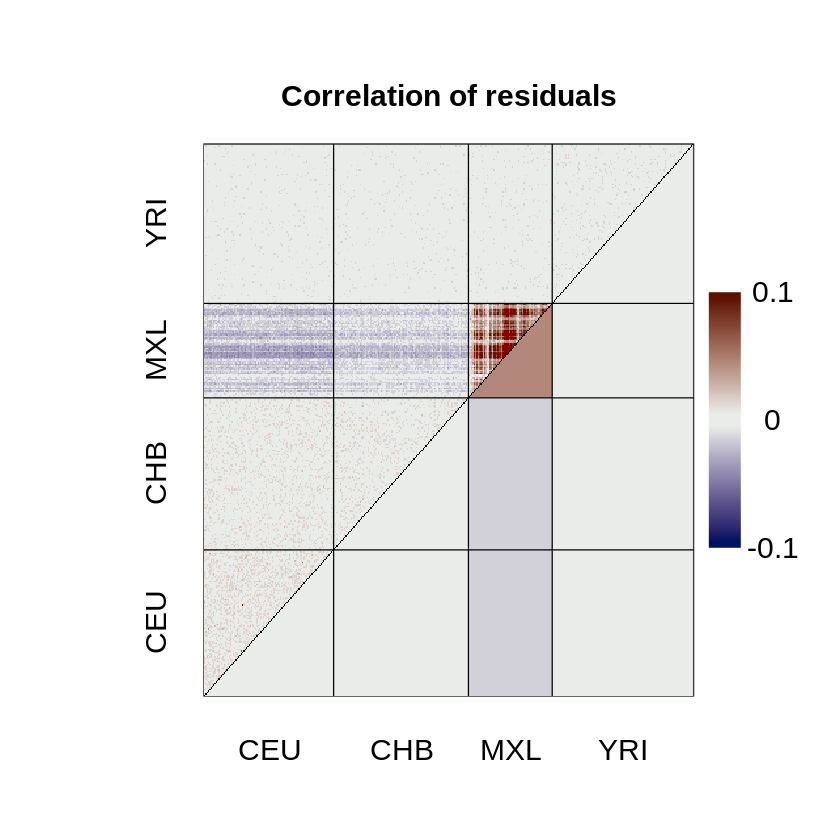

In [6]:

 pca3 <- makePCA(g,method="standard",center=TRUE,scale=TRUE)
 plot(pca3$vectors[,1:2],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")

 res3 <- evalPCA(pca3,k=2)
 plotCorRes(res3$corres, pop,max=0.1)


# ADMIXTURE: Fit of admixture proportions
After running ADMIXTURE the resulting admixture proportions (admixTjeck2.3.Q) and ancestral alleles frequencies (admixTjeck2.3.P) can be read into R. 


In [7]:
## read admixture propotions N x K 
Q <- read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.Q")

## in addition to the estimated Q you also need the genotype matrix g (individuals must be in the same order)

Plot the results


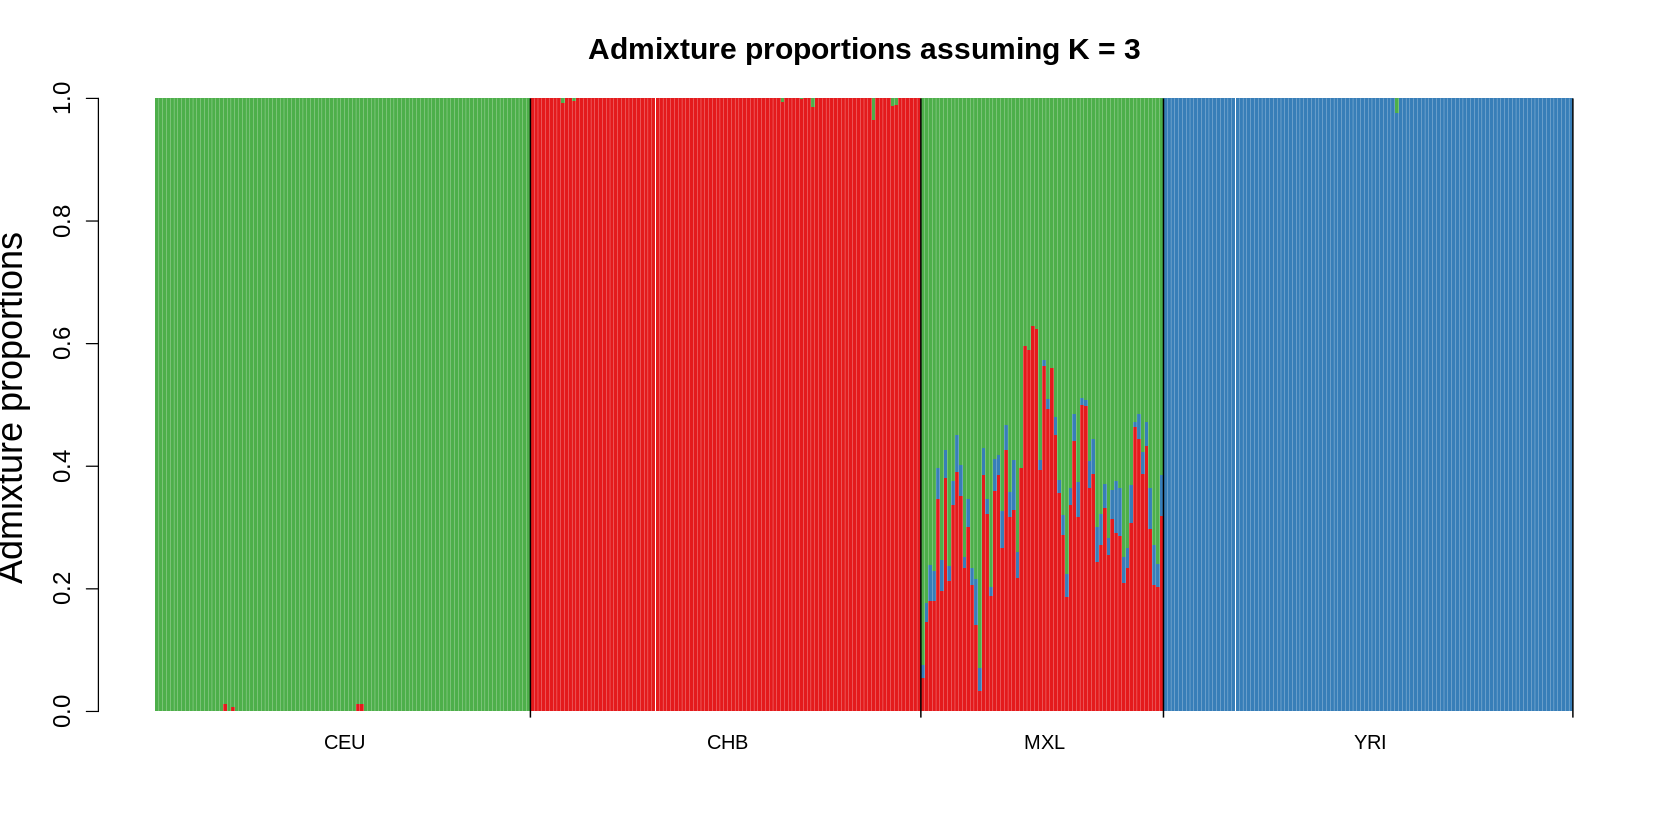

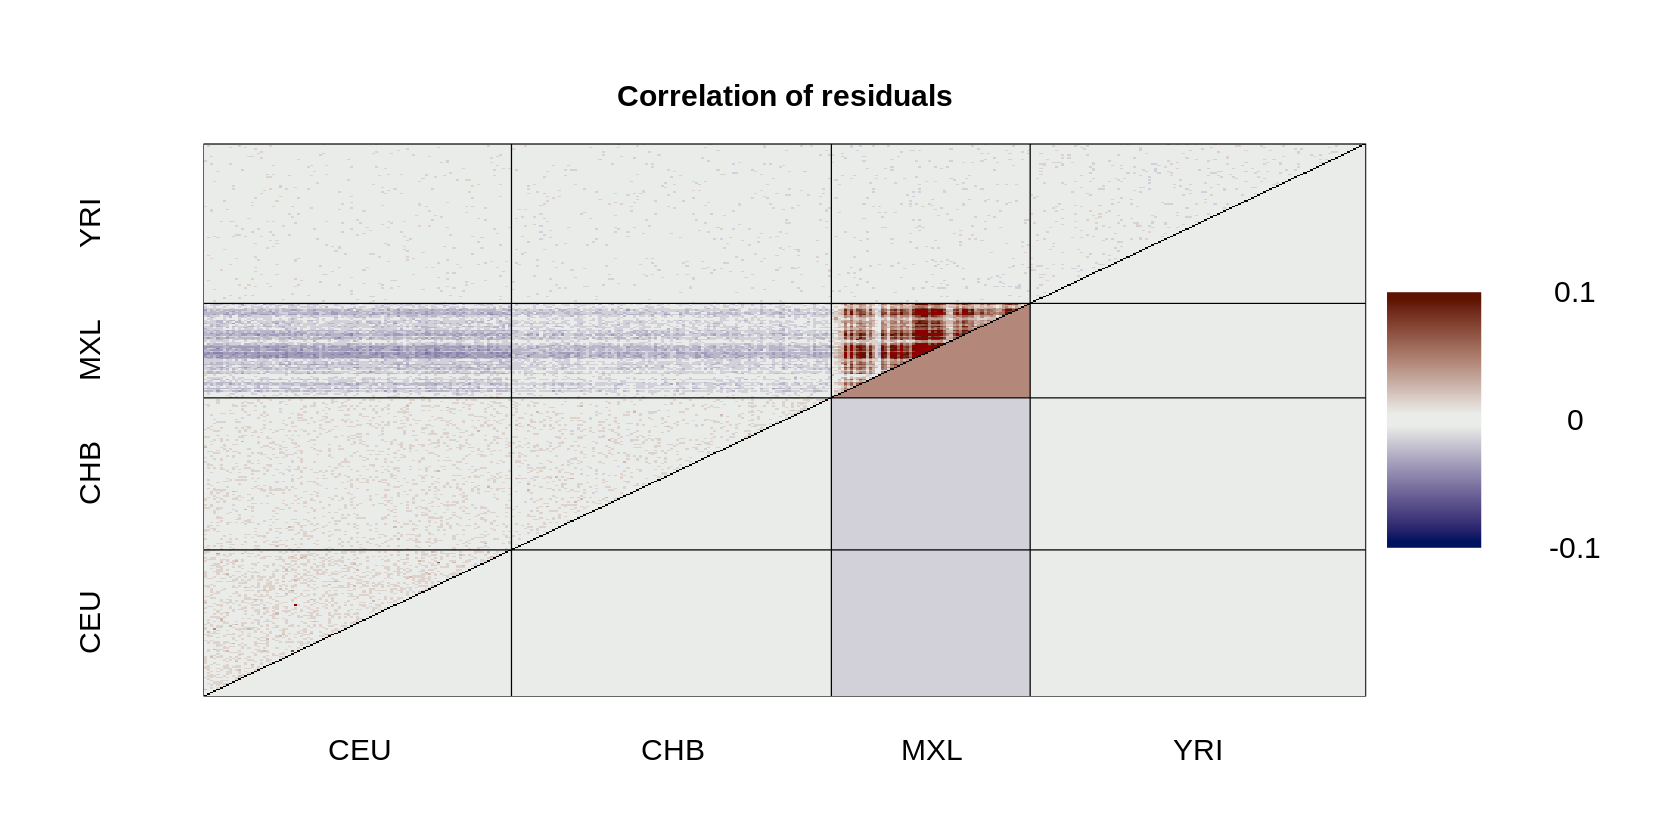

In [8]:
options(repr.plot.width=14, repr.plot.height=7)

## plot admixture
plotAdmix(Q,pop)


## evalulate admixture
eval <- evalPCA(list(method="admixture",g=g,Q=Q))
plotCorRes(eval$corres,pop=pop,max=0.1)


asdfasd


# Evaluation based on estimated individual allele frequencies

In [9]:
## read admixture propotions N x K 
Q <- t(as.matrix(read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.Q")))

## read ancestral allele frequencies M x K
F <- as.matrix(read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.P"))



## individual allele frequencies
PI <- F %*% Q

cat("estimated individual allele frequencies")
dim(PI)



estimated individual allele frequencies

[1] 54048   374

-862.8950,-862.8950,-862.8950,-862.8950,-862.8950
-821.3965,-821.3965,-821.3965,-821.3965,-821.3965
-890.6700,-890.6700,-890.6700,-890.6700,-890.6700
-492.0416,-491.0416,-491.0416,-491.0416,-491.0416
-483.9185,-482.9185,-482.9185,-482.9185,-482.9185


1.0000000,0.9999839,0.9999836,0.9999838,0.9999841
0.9999839,1.0000000,0.9999837,0.9999838,0.9999836
0.9999836,0.9999837,1.0000000,0.9999838,0.9999837
0.9999838,0.9999838,0.9999838,1.0000000,0.9999837
0.9999841,0.9999836,0.9999837,0.9999837,1.0000000


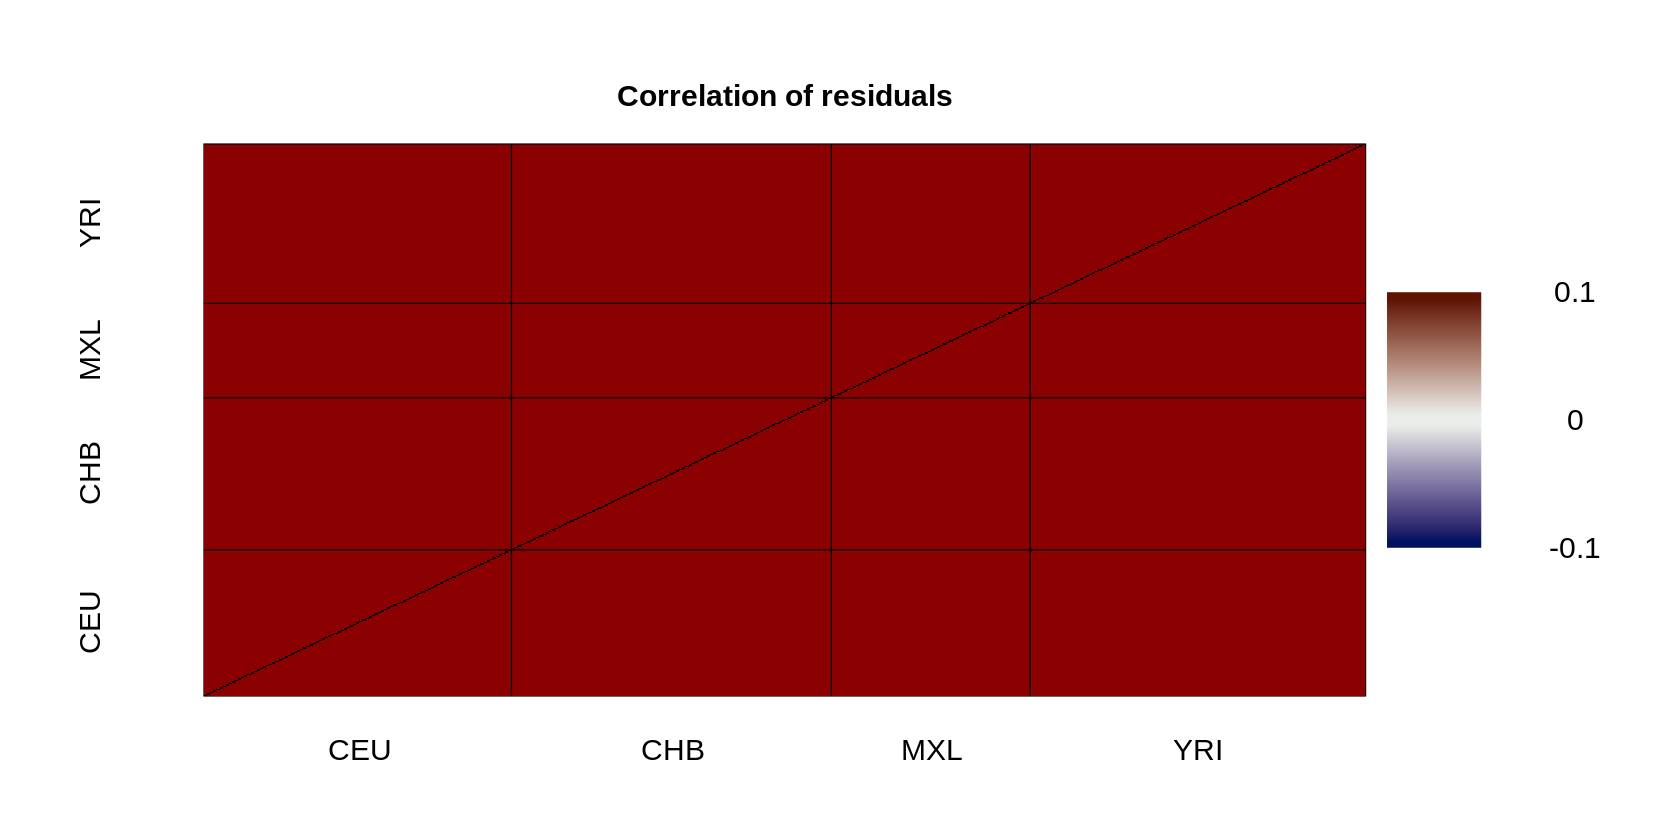

In [10]:



get_p_hat_k_frompi <- function(pi_hat, k){
    # function to calculate p_hat_k from an estimate of pi
    # pi_hat is M x N matrix with estiamte of individual allele frequencies
    # k is number of populations
    
    M <- nrow(pi_hat)
    pi_tilde_k <- pi_hat[sample(M, k),] # select random k rows (i.e. sites) from pi. I don't understand this. 
    p_hat_k <- t(pitilde) %*% inv(pitilde %*% t(pitilde)) %*% pitilde 
    return(p_hat_k)

}

pi <- PI


phatk <- t(pi)%*%pi /M

 corr <- cor(rk <- g %*% (diag(N) - 2*phatk))
rk[1:5,1:5]
 corr[1:5,1:5]
plotCorRes(corr,pop,max=0.1)
#x <- pi%*%%*%t(pi)


[1] 374 374

1.000000000,0.000676038,-0.0147269265,-0.0052237069,0.012285701
0.000676038,1.000000000,-0.0078010615,-0.0028740306,-0.016288348
-0.014726926,-0.007801061,1.0000000000,-0.0009442946,-0.002242412
-0.005223707,-0.002874031,-0.0009442946,1.0000000000,-0.007174504
0.012285701,-0.016288348,-0.0022424115,-0.0071745037,1.000000000


[1] 54048   374

,NA06984,NA06985,NA06986,NA06989,NA06994
NA06984,1.0000000000,0.0004998188,-0.014955605,-0.005414019,0.012101325
NA06985,0.0004998188,1.0000000000,-0.008056544,-0.003092311,-0.016506774
NA06986,-0.0149556052,-0.0080565441,1.000000000,-0.001210975,-0.002506580
NA06989,-0.0054140186,-0.0030923114,-0.001210975,1.000000000,-0.007404008
NA06994,0.0121013246,-0.0165067738,-0.002506580,-0.007404008,1.000000000


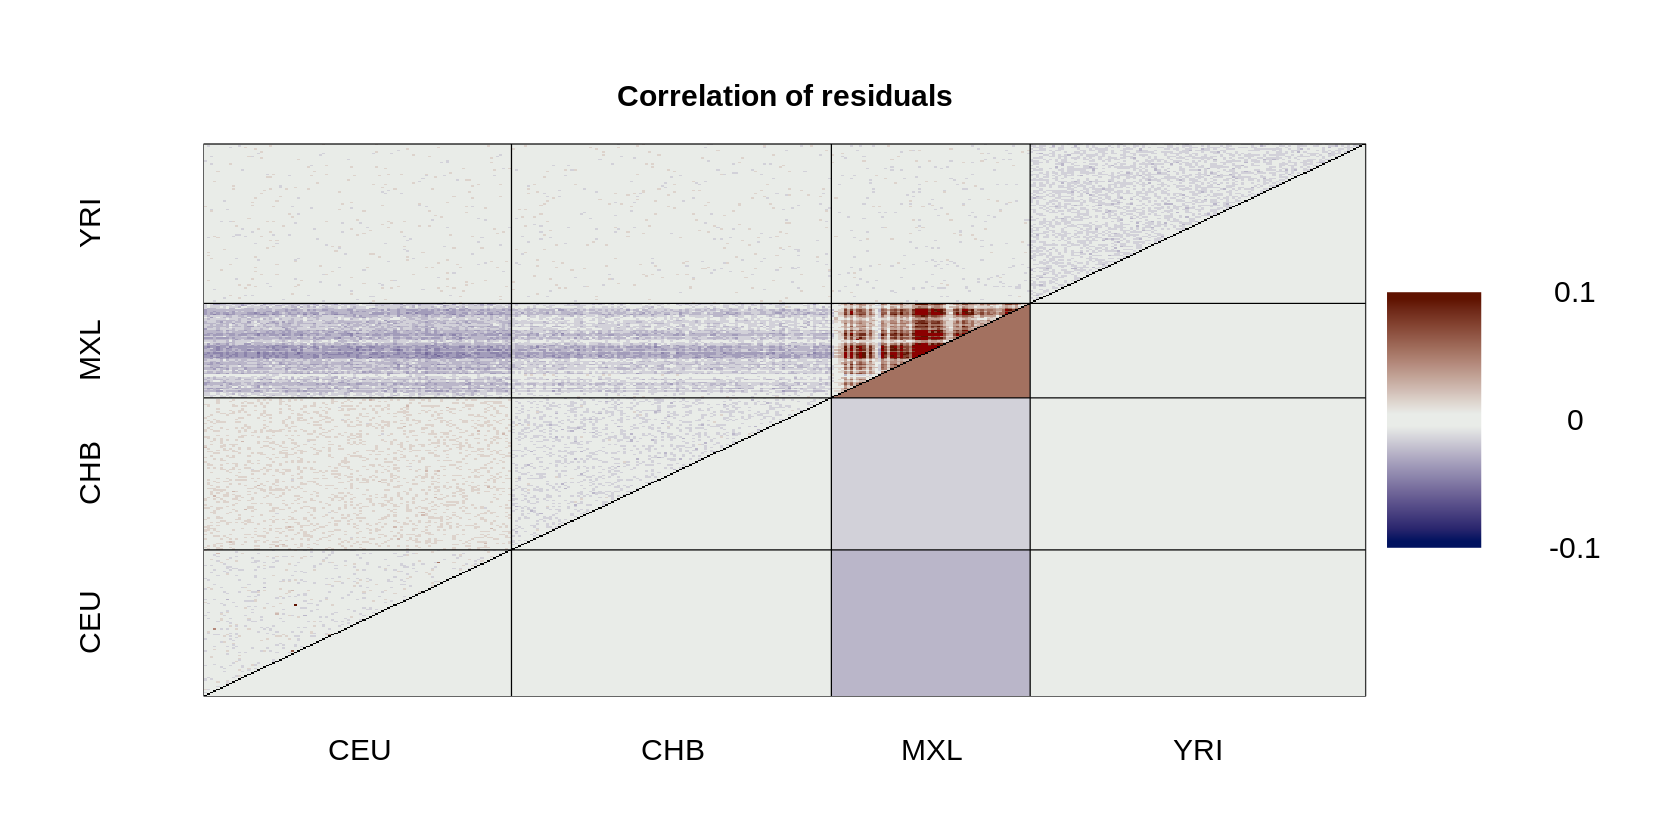

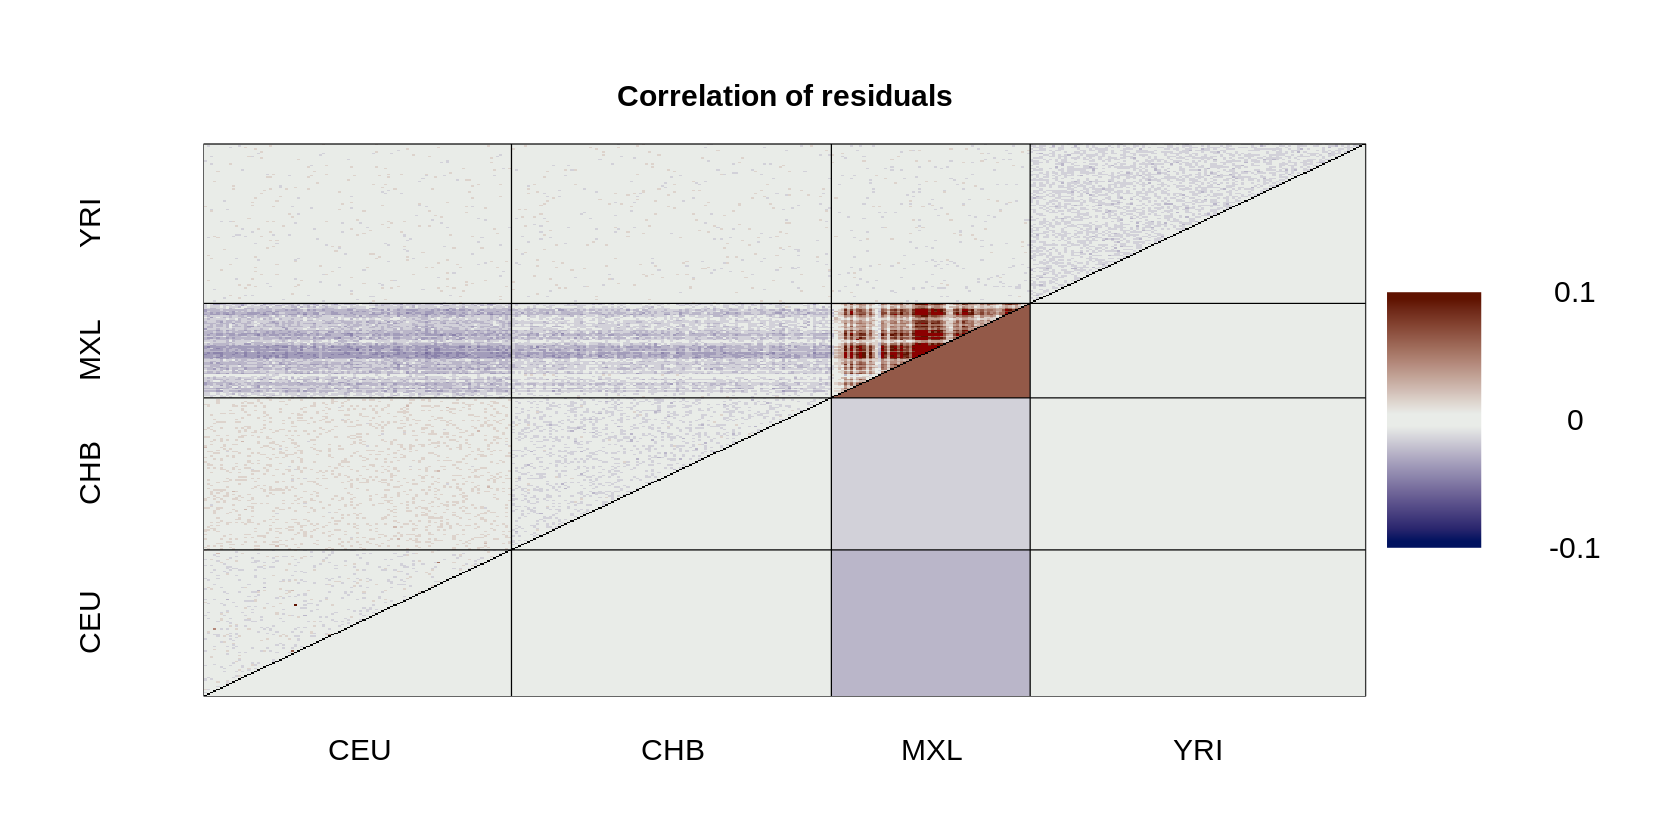

In [11]:
P <- t(Q) %*% MASS::ginv(Q %*% t(Q)) %*% Q

dim(P)


corr <- cor(rk <- g %*% (diag(N) - P))
cor(rk)[1:5,1:5]
dim(r <- g -2*PI)
cor(r)[1:5,1:5]
plotCorRes(corr,pop,max=0.1)
plotCorRes(cor(r),pop,max=0.1)

In [13]:
evalPCA <- function(res,k=2){


  if(res$method == "admixture"){
    res$N <- nrow(res$Q)
    res$D_hat <- diag(colMeans(res$g * (2 - res$g)))
  }

  # get empirical correlation matrix,
  get_b_hat <- function(res, phatk){
    
    rk <- res$g %*% (diag(res$N) - phatk)
    return(cor(rk))
  }

  # get estimated correlation matrix under admixture model
  get_c_hat <- function(res,phatk){
    Cbig <- (diag(res$N) - phatk) %*% res$D_hat %*% (diag(res$N) - phatk)
    return(cov2cor(Cbig))
  }

  ## get project matrix (Residual = genotype ( I - projection matrix )
  get_phat <- function(res){
    if(res$method == "CS")
      return(res$vectors[,1:k] %*% t(res$vectors[,1:k])) 
    else if(res$method == "standard"){
      s_k <- rbind(t(res$vectors)[1:k,], 1)
      return( t(s_k) %*% MASS::ginv(s_k %*% t(s_k)) %*% s_k )
    }
    else if(res$method == "admixture"){
      Qhat <- t(res$Q)
      return(t(Qhat) %*% MASS::ginv(Qhat %*% t(Qhat)) %*% Qhat)
    }
     else if(res$method == "pi"){
      Qhat <- t(res$Q)
      return(t(Qhat) %*% MASS::ginv(Qhat %*% t(Qhat)) %*% Qhat)
    }
    else
      stop("no such method")

  }


  phatk <- get_phat(res)
  bhat <- get_b_hat(res,phatk)
  chat <- get_c_hat(res,phatk)
  return( list(corres=bhat - chat ,bhat=bhat,chat=chat,phatk=phatk))
}

